In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Flatten,Conv2D,MaxPooling2D

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
y_train1 = []
for i in range(len(y_train)):
  lst1 = [0 for i in range(10)]
  lst1[y_train[i][0]] = 1
  y_train1.append(lst1)

In [6]:
y_train1 = np.array(y_train1)
y_train1.shape

(50000, 10)

In [7]:
y_test1 = []
for i in range(len(y_test)):
  lst1 = [0 for i in range(10)]
  lst1[y_test[i][0]] = 1
  y_test1.append(lst1)
y_test1 = np.array(y_test1)
y_test1.shape

(10000, 10)

In [13]:
def plot_histories(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [9]:
def NetA(x_train,y_train1,x_test,y_test1,epochs):
    inputs =  Input(shape = (32,32,3))
    x = Flatten()(inputs)
    output = Dense(10,activation = 'linear')(x)
    model = Model(inputs = inputs,outputs = output)
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(x_train, y_train1,batch_size= 64,epochs= epochs,validation_data=(x_test,y_test1),verbose = 0)
    return history

In [11]:
def NetB(x_train,y_train1,x_test,y_test1,epochs):
  inputs =  Input(shape = (32,32,3))
  x = Flatten()(inputs)
  x = Dense(300,activation = 'relu')(x)
  output = Dense(10,activation = 'linear')(x)
  model1 = Model(inputs = inputs,outputs = output)
  model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history = model1.fit(x_train, y_train1,batch_size= 64,epochs= epochs,validation_data=(x_test,y_test1),verbose = 0)
  return history

In [17]:
def NetC(x_train,y_train1,x_test,y_test1,epochs):
  inputs =  Input(shape = (32,32,3))
  x = Conv2D(25,5,activation = 'relu')(inputs)
  x = MaxPooling2D((2,2),strides = 2)(x)
  x = Flatten()(x)
  output = Dense(10,activation = 'linear')(x)
  model2 = Model(inputs = inputs,outputs = output)
  model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history = model2.fit(x_train, y_train1,batch_size= 64,epochs= 50,validation_data=(x_test,y_test1),verbose = 0)
  return history

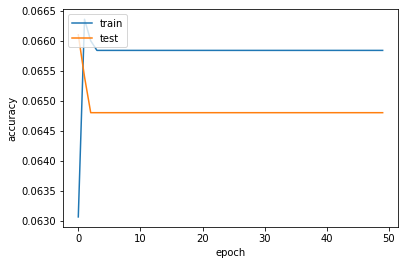

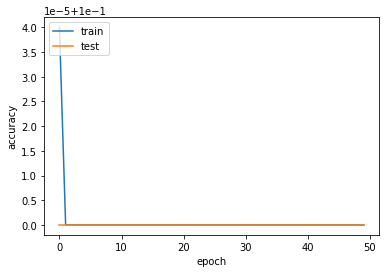

Epoch 1/50
782/782 [==============================] - 32s 7ms/step - loss: 3.3962 - accuracy: 0.1369 - val_loss: 11.2724 - val_accuracy: 0.1003
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 9.8041 - accuracy: 0.1024 - val_loss: 9.6472 - val_accuracy: 0.1032
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 9.5265 - accuracy: 0.1051 - val_loss: 9.4468 - val_accuracy: 0.1210
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 9.2186 - accuracy: 0.1193 - val_loss: 8.7473 - val_accuracy: 0.1199
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 8.7853 - accuracy: 0.1189 - val_loss: 8.4781 - val_accuracy: 0.1199
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 9.0593 - accuracy: 0.1192 - val_loss: 9.0068 - val_accuracy: 0.1205
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 9.2144 - accuracy: 0.1193 - val_loss: 9.0068 - val_accuracy: 0.1205
Epoc

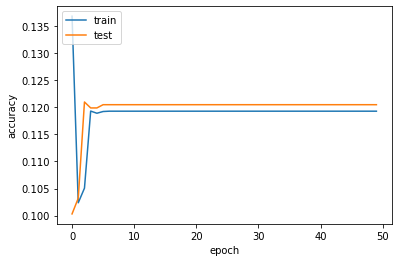

In [16]:
history = NetA(x_train,y_train1,x_test,y_test1,50)
plot_histories(history)
history1 = NetB(x_train,y_train1,x_test,y_test1,50)
plot_histories(history1)
history2 = NetC(x_train,y_train1,x_test,y_test1,50)
plot_histories(history2)